In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
from PIL import *
import os
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
import cv2

2024-04-29 09:58:38.167139: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 09:58:38.226028: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 09:58:45.562142: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_dir = "/mnt/d/OpenImagesV6"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
validation_dir = os.path.join(base_dir, "validation")

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(512, 512),
    batch_size=2,
    color_mode= "rgb",
    class_mode='input'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(512, 512),
    batch_size=2,
    color_mode= "rgb",
    class_mode='input'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(512, 512),
    batch_size=2,
    color_mode= "rgb",
    class_mode='input'
)


Found 507869 images belonging to 1 classes.
Found 125436 images belonging to 1 classes.
Found 41620 images belonging to 1 classes.


In [4]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape = (512, 512, 3)),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(512, (3, 3), activation='relu', padding='same'),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/mnt/c/Users/spal6554/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-29 09:59:12.249408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 09:59:12.275453: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 09:59:12.275505: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA su

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 512, 512, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 512, 512, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,101,443 (11.83 MB)

 Trainable params: 3,101,443 (11.83 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
filepath = '/mnt/d/PreProcessing/EE652/Autoencoder.keras'

es = EarlyStopping(monitor='val_loss', mode='min', patience=500,  restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=1000,
    validation_data=test_generator,
    validation_steps=10
)

Epoch 1/1000


/mnt/c/Users/spal6554/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1714409956.695576   16848 service.cc:145] XLA service 0x7f0c5001c460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714409956.695631   16848 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-04-29 09:59:16.770098: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-29 09:59:16.965945: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
2024-04-29 09:59:

 1/20 ━━━━━━━━━━━━━━━━━━━━ 12:10 38s/step - loss: 0.0451

I0000 00:00:1714409991.487862   16848 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 237ms/step - loss: 0.0851 - val_loss: 0.0578
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.0441 - val_loss: 0.0423
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.0316 - val_loss: 0.0236
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.0192 - val_loss: 0.0196
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0250 - val_loss: 0.0162
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0172 - val_loss: 0.0181
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0168 - val_loss: 0.0165
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - loss: 0.0136 - val_loss: 0.0171
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.0161 - val_loss: 0.0128
Epoch 10/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0108 - val_loss: 0.0172
Epoch 11/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 12/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3

/mnt/c/Users/spal6554/venv/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (102539736 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 374/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 375/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 376/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 377/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 378/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 379/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 380/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 381/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 382/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 383/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 384/1000
20/20 ━━━━

In [7]:
model.save('/mnt/d/PreProcessing/EE652/Autoencoder.keras')

In [8]:
model1 = load_model('/mnt/d/PreProcessing/EE652/Autoencoder.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


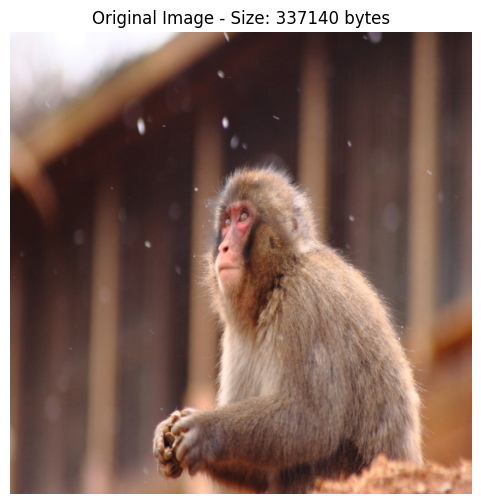

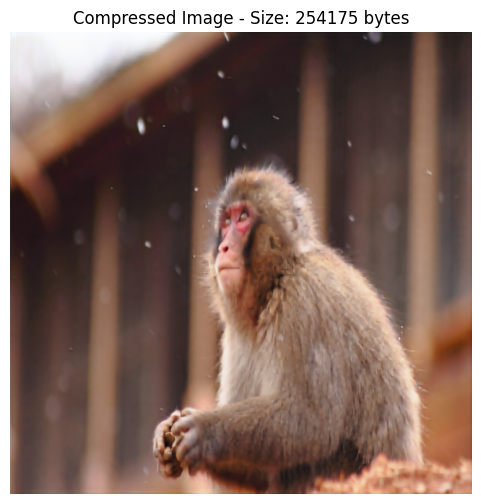

In [51]:
test_batch = next(iter(validation_generator))
images, labels = test_batch
pred_test = model1.predict(test_batch[0])

random_index = np.random.randint(len(images))

original_image = images[random_index]
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.axis("off")
plt.savefig("/mnt/d/PreProcessing/EE652/original_image.png")
original_size = os.path.getsize("/mnt/d/PreProcessing/EE652/original_image.png")
plt.title("Original Image - Size: {} bytes".format(original_size))

plt.show()

compressed_image = pred_test[random_index]
plt.figure(figsize=(6, 6))
plt.imshow(compressed_image)
plt.axis("off")
plt.savefig("/mnt/d/PreProcessing/EE652/compressed_image.png")
compressed_size = os.path.getsize("/mnt/d/PreProcessing/EE652/compressed_image.png")
plt.title("Compressed Image - Size: {} bytes".format(compressed_size))
plt.show()